In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 

fashion_minst = keras.datasets.fashion_mnist  # load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_minst.load_data() #split into training and testing

train_images.shape # there are 60,000 images with 28 X 28 pixel=784 pixels
train_images[0,23,23] # a look at 1 image 0 at 23 column and 23 row pixels, pixel values are b/t 0 and 255 0=black and 255=white
#print(train_images) # multiple images

train_labels[:10] # we look at the first 10 labels of the training labels

class_names = [ 'T-shirt/Top','Trousers','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

#plt.figure()
#plt.imshow(train_images[4])
#plt.colorbar()
#plt.grid(False)
#plt.show()
# Data preprocessing
#data preprocessing
train_images = train_images /250.0 # scale the pixel values to smaller size between 0 and 1
test_images = test_images /250.0


# now its the time to build a feed-forward keras sequential model: feed forward neural network
# there are other types of model other than sequentioal such as  convolutional
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # input layer (1)
    keras.layers.Dense(128, activation = 'relu'), #hiden layer (2)
    keras.layers.Dense(10, activation = 'softmax') #output layer (3)
    
])

# next we compile the model pick the optimizer of our model
model.compile(optimizer='adam', # adam is the optimizer that performs the gradient descent used here: their are others too
              loss = 'sparse_categorical_crossentropy', #loss 
              metrics = ['accuracy']) # the output they want to see from the network is accuracy
# we can change the values 128, 10 the optmizer, loss in hyper parameter tunning to get our output



















In [2]:
model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 15s 3ms/step - loss: 0.4981 - accuracy: 0.8238
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3723 - accuracy: 0.8640
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3338 - accuracy: 0.8779


In [3]:
test_lost, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('test_accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3766 - accuracy: 0.8661
test_accuracy: 0.866100013256073


313/313 [==============================] - 1s 3ms/step
Coat


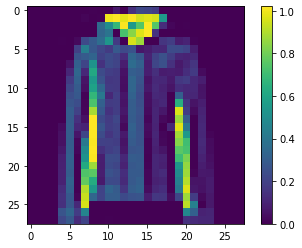

In [7]:
predictions = model.predict(test_images)
#print(predictions[0])
print(class_names[np.argmax(predictions[6])])
plt.figure()
plt.imshow(test_images[6])
plt.colorbar()
plt.grid(False)
plt.show()
